# Extracting data for 2018 and 2019 movies from Wikipedia 

### Extracting features of 2018 movies from Wikipedia

In [1]:
import pandas as pd
import numpy as np

In [13]:
wikilink = "https://en.wikipedia.org/wiki/List_of_American_films_of_2018"
# there are 4 different tables for 4 different quarters, we'll read the tables seperately and join those together
# we'll start taking from 2nd index as that's from where the table we need starts on the wiki page

df1= pd.read_html(wikilink,header=0)[2]
df2= pd.read_html(wikilink,header=0)[3]
df3= pd.read_html(wikilink,header=0)[4]
df4= pd.read_html(wikilink,header=0)[5]


In [14]:
df=df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)

In [16]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / S...,Adam Robitel (director); Leigh Whannell (scree...,[2]
1,JANUARY,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcl...,[3]
2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren...",[4]
3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, St...",[5]
4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,Jaume Collet-Serra (director); Byron Willinger...,[6]
...,...,...,...,...,...,...
264,DECEMBER,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions,Etan Cohen (director/screenplay); Will Ferrell...,[163]
265,DECEMBER,25,Vice,Annapurna Pictures / Plan B Entertainment,Adam McKay (director/screenplay); Christian Ba...,[137]
266,DECEMBER,25,On the Basis of Sex,Focus Features,Mimi Leder (director); Daniel Stiepleman (scre...,[226]
267,DECEMBER,25,Destroyer,Annapurna Pictures,"Karyn Kusama (director); Phil Hay, Matt Manfre...",[258]


In [17]:
# Note that the data from wikipedia does not have Genres column which we need for our application,
# we'll pull it from TMDB database through api by creating installing the TMDBapi library and using TMDB api key which can be 
# created from TMDB site https://www.themoviedb.org/settings/api after creating an account

!pip install tmdbv3api

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [18]:
from tmdbv3api import TMDb
import json
import requests
tmdb=TMDb()
tmdb.api_key='40b54d7df35213771dbeee679c888397'
from tmdbv3api import Movie
tmdb_movie= Movie()

In [ ]:

# sample of the details retrived using tmdb_movie.search
# mov=tmdb_movie.search('Inception')

# If the result matches multiple movies, each movie details will be in a dictionaries within a list
# Here you can see that for genres, we have genre_ids as a list which has multiple genres id


# {
# 'adult': False,
#  'backdrop_path': '/s3TBrRGB1iav7gFOCNx3H31MoES.jpg', 
#  'genre_ids': [28, 878, 12], 
#  'id': 27205,
#  'original_language': 'en', 
#  'original_title': 'Inception', 
#  'overview': 'Cobb, a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chance to regain his old life as payment for a task considered to be impossible: "inception", the implantation of another person\'s idea into a target\'s subconscious.',
#  'popularity': 60.915, 
#  'poster_path': '/9gk7adHYeDvHkCSEqAvQNLV5Uge.jpg', 
#  'release_date': '2010-07-15', 
#  'title': 'Inception', 
#  'video': False, 
#  'vote_average': 8.3, 
#  'vote_count': 29000
#  }



In [ ]:
# sample of the api call which gives a detailed data
# https://api.themoviedb.org/3/movie/27205?api_key=40b54d7df35213771dbeee679c888397

#Here you can see that we actually see the detailed genre names in a list of dictionaries as key values pair name with their id

# {
# "adult":false,
# "backdrop_path":"/s3TBrRGB1iav7gFOCNx3H31MoES.jpg",
# "belongs_to_collection":null,"budget":160000000,
# "genres":[{"id":28,"name":"Action"},{"id":878,"name":"Science Fiction"},{"id":12,"name":"Adventure"}],
# "homepage":"http://inceptionmovie.warnerbros.com/",
# "id":27205,
# "imdb_id":"tt1375666",
# "original_language":"en",
# "original_title":"Inception",
# "overview":"Cobb, a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chance to regain his old life as payment for a task considered to be impossible: \"inception\", the implantation of another person's idea into a target's subconscious.",
# "popularity":60.915,"poster_path":"/9gk7adHYeDvHkCSEqAvQNLV5Uge.jpg",
# "production_companies":[{"id":923,"logo_path":"/5UQsZrfbfG2dYJbx8DxfoTr2Bvu.png","name":"Legendary Pictures","origin_country":"US"},{"id":9996,"logo_path":"/3tvBqYsBhxWeHlu62SIJ1el93O7.png","name":"Syncopy","origin_country":"GB"},{"id":174,"logo_path":"/IuAlhI9eVC9Z8UQWOIDdWRKSEJ.png","name":"Warner Bros. Pictures","origin_country":"US"}],
# "production_countries":[{"iso_3166_1":"GB","name":"United Kingdom"},{"iso_3166_1":"US","name":"United States of America"}],
# "release_date":"2010-07-15",
# "revenue":825532764,
# "runtime":148,
# "spoken_languages":[{"english_name":"English","iso_639_1":"en","name":"English"},{"english_name":"Japanese","iso_639_1":"ja","name":"日本語"},{"english_name":"French","iso_639_1":"fr","name":"Français"}],
# "status":"Released",
# "tagline":"Your mind is the scene of the crime.",
# "title":"Inception",
# "video":false,
# "vote_average":8.3,
# "vote_count":29004
# }

In [44]:
# we'll write a function to retreive the genres data from TMDB website using the api key by passing the movie title and 
# retrieving their genres respectively
#Example API Request from TMDB website: 
# https://api.themoviedb.org/3/movie/550?api_key=40b54d7df35213771dbeee679c888397  



def get_genre(x):
    genres=[]
    result=tmdb_movie.search(x)  #gives the results of all the matched movies in a list of dictionaries(one dict for each movie)
    movie_id=result[0].id # retrieves the id key, of the first movie in the list of retrieved movies
    
    response=requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key)) 
    #data is received as response format which would needed to converted to json 
    
    data_json=response.json() # coverting the response data to  json
    
    if data_json['genres']:
        genre_str=" "    #adding space between the genre names
        for i in range(0,len(data_json['genres'])):
            genres.append(data_json['genres'][i]['name'])  
            # from data_json, retreiving genres key, and then within the list of dictionries within genres, 
            # picking the name of all the genre names one by one
        return genre_str.join(genres)
    else:
        np.NaN



In [45]:
df['genres']=df['Title'].map(lambda x: get_genre(str(x)))

In [46]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.,genres
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / S...,Adam Robitel (director); Leigh Whannell (scree...,[2],Horror Mystery Thriller
1,JANUARY,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcl...,[3],Thriller Drama
2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren...",[4],Action Thriller
3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, St...",[5],Drama History Western
4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,Jaume Collet-Serra (director); Byron Willinger...,[6],Action Thriller
...,...,...,...,...,...,...,...
264,DECEMBER,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions,Etan Cohen (director/screenplay); Will Ferrell...,[163],Mystery Adventure Comedy Crime
265,DECEMBER,25,Vice,Annapurna Pictures / Plan B Entertainment,Adam McKay (director/screenplay); Christian Ba...,[137],Thriller Science Fiction Action Adventure
266,DECEMBER,25,On the Basis of Sex,Focus Features,Mimi Leder (director); Daniel Stiepleman (scre...,[226],Drama History
267,DECEMBER,25,Destroyer,Annapurna Pictures,"Karyn Kusama (director); Phil Hay, Matt Manfre...",[258],Thriller Crime Drama Action


In [93]:
# now only taking the fields that we need 

df_2018= df[['Title','Cast and crew','genres']]
df_2018

,Title,Cast and crew,genres
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,Horror Mystery Thriller
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcl...,Thriller Drama
2,Stratton,"Simon West (director); Duncan Falconer, Warren...",Action Thriller
3,Sweet Country,"Warwick Thornton (director); David Tranter, St...",Drama History Western
4,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller
...,...,...,...
264,Holmes & Watson,Etan Cohen (director/screenplay); Will Ferrell...,Mystery Adventure Comedy Crime
265,Vice,Adam McKay (director/screenplay); Christian Ba...,Thriller Science Fiction Action Adventure
266,On the Basis of Sex,Mimi Leder (director); Daniel Stiepleman (scre...,Drama History
267,Destroyer,"Karyn Kusama (director); Phil Hay, Matt Manfre...",Thriller Crime Drama Action


In [64]:
# now we will write functions to extract director, actor 1,2,3 from Cast and crew field

# the cast and crew data is extracted from wikipedia which has the below form.
# so to extract director we will, extract name before  (director)/ (directors)/ or (director/screenplay)
# to extract actors, we will extract actor 1,2 3  from the list after (screenplay);

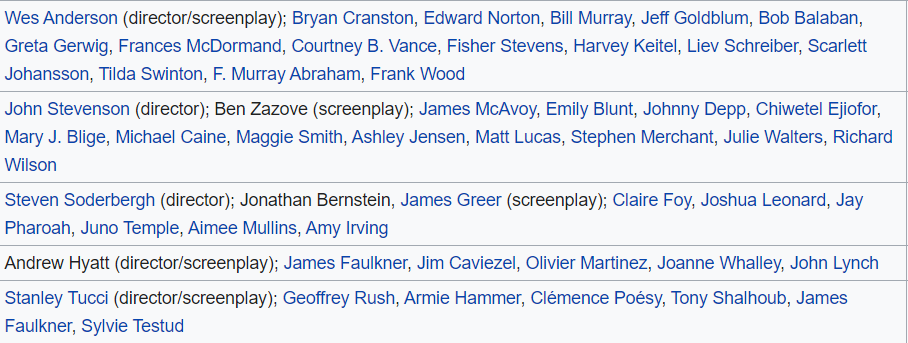

In [100]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0] #spliting " (director)" and taking the name before it
    elif  " (directors)" in x:
        return x.split(" (director)")[0]
    else:
        return x.split(" (director/screenplay)")[0]
        

In [101]:
df_2018['director_name']=df_2018['Cast and crew'].map(lambda x: get_director(x))

<ipython-input-101-2b40ba3fffe6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['director_name']=df_2018['Cast and crew'].map(lambda x: get_director(x))


In [103]:
df_2018.head()

,Title,Cast and crew,genres,director_name
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,Horror Mystery Thriller,Adam Robitel
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcl...,Thriller Drama,Lauren Wolkstein
2,Stratton,"Simon West (director); Duncan Falconer, Warren...",Action Thriller,Simon West
3,Sweet Country,"Warwick Thornton (director); David Tranter, St...",Drama History Western,Warwick Thornton
4,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller,Jaume Collet-Serra


In [116]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

    #splitting after "screenplay); " taking all data after splitting criteria 
    # and then again splitting the result based on (", ") and taking the first value as actor 1

In [117]:
df_2018['actor_1_name']=df_2018['Cast and crew'].map(lambda x: get_actor1(x) )

<ipython-input-117-1f14c3ff6f07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_1_name']=df_2018['Cast and crew'].map(lambda x: get_actor1(x) )


In [118]:
df_2018.head()

,Title,Cast and crew,genres,director_name,actor_1_name
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,Horror Mystery Thriller,Adam Robitel,Lin Shaye
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcl...,Thriller Drama,Lauren Wolkstein,Alex Pettyfer
2,Stratton,"Simon West (director); Duncan Falconer, Warren...",Action Thriller,Simon West,Dominic Cooper
3,Sweet Country,"Warwick Thornton (director); David Tranter, St...",Drama History Western,Warwick Thornton,Bryan Brown
4,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller,Jaume Collet-Serra,Liam Neeson


In [119]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ") ) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [120]:
df_2018['actor_2_name']=df_2018['Cast and crew'].map(lambda x: get_actor2(x) )

<ipython-input-120-6a1e6d792491>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_2_name']=df_2018['Cast and crew'].map(lambda x: get_actor2(x) )


In [122]:
df_2018.head()

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,Horror Mystery Thriller,Adam Robitel,Lin Shaye,Angus Sampson
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcl...,Thriller Drama,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson
2,Stratton,"Simon West (director); Duncan Falconer, Warren...",Action Thriller,Simon West,Dominic Cooper,Austin Stowell
3,Sweet Country,"Warwick Thornton (director); David Tranter, St...",Drama History Western,Warwick Thornton,Bryan Brown,Sam Neill
4,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller,Jaume Collet-Serra,Liam Neeson,Vera Farmiga


In [161]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ") ) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [162]:
df_2018['actor_3_name']=df_2018['Cast and crew'].map(lambda x: get_actor3(x) )

In [163]:
df_2018.head()

,movie_title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,Horror Mystery Thriller,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcl...,Thriller Drama,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus
2,Stratton,"Simon West (director); Duncan Falconer, Warren...",Action Thriller,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan
3,Sweet Country,"Warwick Thornton (director); David Tranter, St...",Drama History Western,Warwick Thornton,Bryan Brown,Sam Neill,NaN
4,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson


In [164]:
#renaming column names to match previous processing files

df_2018=df_2018.rename(columns={'Title':'movie_title'})

In [165]:
# only keeping the needed columns
new_df18 = df_2018.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [166]:
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,Insidious: The Last Key
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,The Strange Ones
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,Action Thriller,Stratton
3,Warwick Thornton,Bryan Brown,Sam Neill,NaN,Drama History Western,Sweet Country
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller,The Commuter
...,...,...,...,...,...,...
264,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,Mystery Adventure Comedy Crime,Holmes & Watson
265,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Thriller Science Fiction Action Adventure,Vice
266,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,Drama History,On the Basis of Sex
267,Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell,Thriller Crime Drama Action,Destroyer


In [167]:
# replacing NAN actor2 and actor3 with 'UNKNOWN' value

new_df18['actor_2_name']=new_df18['actor_2_name'].replace(np.NaN,'UNKNOWN')
new_df18['actor_3_name']=new_df18['actor_3_name'].replace(np.NaN,'UNKNOWN')

In [168]:
new_df18['movie_title']=new_df18['movie_title'].str.lower()

In [169]:
new_df18['comb'] = new_df18['actor_1_name'] + ' ' + new_df18['actor_2_name'] + ' '+ new_df18['actor_3_name'] + ' '+\
new_df18['director_name'] +' ' + new_df18['genres']

In [170]:
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,insidious: the last key,Lin Shaye Angus Sampson Leigh Whannell Adam Ro...
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,the strange ones,Alex Pettyfer James Freedson-Jackson Emily Alt...
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,Action Thriller,stratton,Dominic Cooper Austin Stowell Gemma Chan Simon...
3,Warwick Thornton,Bryan Brown,Sam Neill,UNKNOWN,Drama History Western,sweet country,Bryan Brown Sam Neill UNKNOWN Warwick Thornton...
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller,the commuter,Liam Neeson Vera Farmiga Patrick Wilson Jaume ...
...,...,...,...,...,...,...,...
264,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,Mystery Adventure Comedy Crime,holmes & watson,Will Ferrell John C. Reilly Rebecca Hall Etan ...
265,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Thriller Science Fiction Action Adventure,vice,Christian Bale Amy Adams Steve Carell Adam McK...
266,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,Drama History,on the basis of sex,Felicity Jones Armie Hammer Justin Theroux Mim...
267,Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell,Thriller Crime Drama Action,destroyer,Nicole Kidman Sebastian Stan Toby Kebbell Kary...


## Extracting features of 2019 movies from Wikipedia

In [202]:
# Since the extraction of the entire process for 2019 data is the same as 2018,
# we will create a resusable function and then call it get the 2019 as well as 2020 data
# for the functiont be resusable we will use a specialist web scraping library beautiful soup
# beautiful soup will help us to automatically idenify the tables that we need based on the class= 'wikitable sortable'


def get_movie_data(wikilink):
    import pandas as pd
    import numpy as np
    import requests
    import bs4
    import urllib.request
    source = urllib.request.urlopen(wikilink).read()
    soup = bs4.BeautifulSoup(source,'lxml')
    tables = soup.find_all('table',class_='wikitable sortable')
    
    df1=pd.read_html(str(tables[0]))[0]
    df2=pd.read_html(str(tables[1]))[0]
    df3=pd.read_html(str(tables[2]))[0]
    df4=pd.read_html(str(tables[3]))[0] 
    
    df=df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)
    
    from tmdbv3api import TMDb
    import json
    import requests
    tmdb=TMDb()
    tmdb.api_key='40b54d7df35213771dbeee679c888397'
    from tmdbv3api import Movie
    tmdb_movie= Movie()
    
    def get_genre(x):
        genres = []
        result = tmdb_movie.search(x)
        
        #also adding a condition if there is so result retrieved for the requested movie
        if not result:
          return np.NaN
        else:
          movie_id = result[0].id
          response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
          data_json = response.json()
          if data_json['genres']:
              genre_str = " " 
              for i in range(0,len(data_json['genres'])):
                  genres.append(data_json['genres'][i]['name'])
              return genre_str.join(genres)
          else:
              return np.NaN
            
    df['genres']=df['Title'].map(lambda x: get_genre(str(x)))
    df_2018= df[['Title','Cast and crew','genres']]
    
    def get_director(x):
        if " (director)" in x:
            return x.split(" (director)")[0] #spliting " (director)" and taking the name before it
        elif  " (directors)" in x:
            return x.split(" (director)")[0]
        else:
            return x.split(" (director/screenplay)")[0]
        
    df_2018['director_name']=df_2018['Cast and crew'].map(lambda x: get_director(x))
    
    def get_actor1(x):
        return ((x.split("screenplay); ")[-1]).split(", ")[0])
    
    df_2018['actor_1_name']=df_2018['Cast and crew'].map(lambda x: get_actor1(x) )
    
    def get_actor2(x):
        if len((x.split("screenplay); ")[-1]).split(", ") ) < 2:
            return np.NaN
        else:
            return ((x.split("screenplay); ")[-1]).split(", ")[1])
        
    df_2018['actor_2_name']=df_2018['Cast and crew'].map(lambda x: get_actor2(x) )
    
    
    def get_actor3(x):
        if len((x.split("screenplay); ")[-1]).split(", ") ) < 3:
            return np.NaN
        else:
            return ((x.split("screenplay); ")[-1]).split(", ")[2])
    
    df_2018['actor_3_name']=df_2018['Cast and crew'].map(lambda x: get_actor3(x) )
    
    df_2018=df_2018.rename(columns={'Title':'movie_title'})
    
    new_df18 = df_2018.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]
    
    new_df18['actor_2_name']=new_df18['actor_2_name'].replace(np.NaN,'UNKNOWN')
    new_df18['actor_3_name']=new_df18['actor_3_name'].replace(np.NaN,'UNKNOWN')
    
    new_df18['movie_title']=new_df18['movie_title'].str.lower()
    
    new_df18['comb'] = new_df18['actor_1_name'] + ' ' + new_df18['actor_2_name'] + ' '+ new_df18['actor_3_name'] + ' '+\
    new_df18['director_name'] +' ' + new_df18['genres']
    
    return new_df18


In [203]:
# calling the get_movie_data function and store the resulting data frame in a new df

wikilink="https://en.wikipedia.org/wiki/List_of_American_films_of_2019"
new_df19=get_movie_data(wikilink)

<ipython-input-202-5acfe823b9d1>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['director_name']=df_2018['Cast and crew'].map(lambda x: get_director(x))
<ipython-input-202-5acfe823b9d1>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_1_name']=df_2018['Cast and crew'].map(lambda x: get_actor1(x) )
<ipython-input-202-5acfe823b9d1>:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [204]:
new_df19

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Taylor Russell,Logan Miller,Deborah Ann Woll,Thriller Action Mystery Adventure Horror,escape room,Taylor Russell Logan Miller Deborah Ann Woll A...
1,Jen McGowan,Hermione Corfield,Jay Paulson,Sean O'Bryan,Thriller Drama,rust creek,Hermione Corfield Jay Paulson Sean O'Bryan Jen...
2,Wilson Coneybeare,Donald Sutherland,Vincent Kartheiser,Oliver Dennis,Thriller,american hangman,Donald Sutherland Vincent Kartheiser Oliver De...
3,Charles Martin Smith,Bryce Dallas Howard,Edward James Olmos,Alexandra Shipp,Drama Adventure Family,a dog's way home,Bryce Dallas Howard Edward James Olmos Alexand...
4,Neil Burger,Bryan Cranston,Kevin Hart,Nicole Kidman,Comedy Drama,the upside,Bryan Cranston Kevin Hart Nicole Kidman Neil B...
...,...,...,...,...,...,...,...
237,"Nick Bruno, Troy Quane (directors); Brad Copel...",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,Will Smith Tom Holland Rashida Jones Nick Brun...
238,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance,little women,Saoirse Ronan Emma Watson Florence Pugh Greta ...
239,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Drama Action Thriller,1917,George MacKay Dean-Charles Chapman Mark Strong...
240,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Desti...


## Extracting features of 2020 movies from Wikipedia

In [205]:
#using the same function passing the call

wikilink="https://en.wikipedia.org/wiki/List_of_American_films_of_2020"
new_df20=get_movie_data(wikilink)

<ipython-input-202-5acfe823b9d1>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['director_name']=df_2018['Cast and crew'].map(lambda x: get_director(x))
<ipython-input-202-5acfe823b9d1>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_1_name']=df_2018['Cast and crew'].map(lambda x: get_actor1(x) )
<ipython-input-202-5acfe823b9d1>:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [206]:
new_df20

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho,Horror Mystery Thriller,the grudge,Andrea Riseborough Demián Bichir John Cho Nico...
1,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick,Action Horror Science Fiction Thriller,underwater,Kristen Stewart Vincent Cassel Jessica Henwick...
2,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek,Comedy,like a boss,Tiffany Haddish Rose Byrne Salma Hayek Miguel ...
3,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins,Drama,three christs,Richard Gere Peter Dinklage Walton Goggins Jon...
4,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs,Drama Thriller Crime,inherit the viper,Josh Hartnett Margarita Levieva Chandler Riggs...
...,...,...,...,...,...,...,...
266,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,Action Fantasy Family Comedy,we can be heroes,Priyanka Chopra Jonas Pedro Pascal YaYa Gossel...
267,Paul Greengrass,Tom Hanks,Helena Zengel,UNKNOWN,Action Adventure Drama Western,news of the world,Tom Hanks Helena Zengel UNKNOWN Paul Greengras...
268,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,one night in miami...,Kingsley Ben-Adir Eli Goree Aldis Hodge Regina...
269,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,Thriller Crime Drama,promising young woman,Carey Mulligan Bo Burnham Alison Brie Emerald ...


In [207]:
df_181920= new_df18.append(new_df19.append(new_df20,ignore_index=True),ignore_index=True)

In [208]:
df_181920

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,insidious: the last key,Lin Shaye Angus Sampson Leigh Whannell Adam Ro...
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,the strange ones,Alex Pettyfer James Freedson-Jackson Emily Alt...
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,Action Thriller,stratton,Dominic Cooper Austin Stowell Gemma Chan Simon...
3,Warwick Thornton,Bryan Brown,Sam Neill,UNKNOWN,Drama History Western,sweet country,Bryan Brown Sam Neill UNKNOWN Warwick Thornton...
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller,the commuter,Liam Neeson Vera Farmiga Patrick Wilson Jaume ...
...,...,...,...,...,...,...,...
777,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,Action Fantasy Family Comedy,we can be heroes,Priyanka Chopra Jonas Pedro Pascal YaYa Gossel...
778,Paul Greengrass,Tom Hanks,Helena Zengel,UNKNOWN,Action Adventure Drama Western,news of the world,Tom Hanks Helena Zengel UNKNOWN Paul Greengras...
779,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,one night in miami...,Kingsley Ben-Adir Eli Goree Aldis Hodge Regina...
780,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,Thriller Crime Drama,promising young woman,Carey Mulligan Bo Burnham Alison Brie Emerald ...


In [209]:
# reading data from processing file 2, i.e data till 2017 movies

df_till17=pd.read_csv('new_data.csv')

In [210]:
df_till17

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,UNKNOWN,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker UNKNOWN Doug Walker Doc...
...,...,...,...,...,...,...,...
5359,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield ...
5360,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Loui...
5361,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Ha...
5362,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden...


In [211]:
# combining the data to get movies till 2019

final_df=df_till17.append(df_181920,ignore_index=True)

In [212]:
final_df.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           4
movie_title      0
comb             4
dtype: int64

In [213]:
final_df=final_df.dropna(how='any')

In [214]:
final_df.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
comb             0
dtype: int64

In [215]:
final_df.to_csv('main_data.csv',index=False)